# SENTIMENT ANALYSIS USING VADER

In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
data=pd.read_csv('1429_1.csv')

C:\Users\VINAYAKA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [5]:
df=data[["id","reviews.text","reviews.rating"]]

In [6]:
df

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0
...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,This is not appreciably faster than any other ...,3.0
34656,AVpfiBlyLJeJML43-4Tp,Amazon should include this charger with the Ki...,1.0
34657,AVpfiBlyLJeJML43-4Tp,Love my Kindle Fire but I am really disappoint...,1.0
34658,AVpfiBlyLJeJML43-4Tp,I was surprised to find it did not come with a...,1.0


In [7]:
df.describe(include=['O'])

,id,reviews.text
count,34660,34659
unique,42,34659
top,AVphgVaX1cnluZ0-DR74,This product so far has not disappointed. My c...
freq,10966,1


In [8]:
df.isnull().sum()

id                 0
reviews.text       1
reviews.rating    33
dtype: int64

In [9]:
df['reviews.text']=df['reviews.text'].fillna('')

C:\Users\VINAYAKA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# REPITITION OF WORDS OVER ALL THE COMMENTS

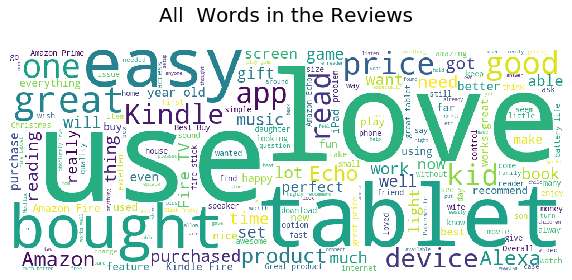

In [10]:
rt = df['reviews.text']
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate(" ".join(rt))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('All  Words in the Reviews\n',size=20)
plt.axis('off')
plt.show()

# REPITITION OF THE COMMON WORDS

In [11]:
words = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

rt = " ".join(map(str,data['reviews.text']))

In [12]:
diz = {}
for word in rt.split(" "):
    if word in words:
        diz[word] = diz.get(word,0)+1

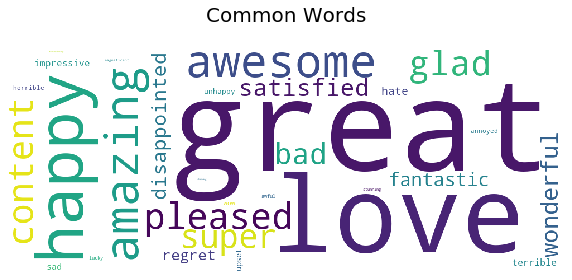

In [13]:
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate_from_frequencies(diz)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Common Words\n',size=20)
plt.axis('off')
plt.show()

In [14]:
def sentimental(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    return score

# VADER sentiment analysis tool for getting pos, neg and neu.
def sentimental_Score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score >= 0.5:
        return 'pos'
    elif (score > -0.5) and (score < 0.5):
        return 'neu'
    elif score <= -0.5:
        return 'neg'

In [15]:
df['sentiment_score']=(df['reviews.text']).apply(lambda x:sentimental_Score(x))

C:\Users\VINAYAKA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# BAR GRAPH OF POSITIVE AND NEGATIVE AND NEUTRAL WORDS IN THE COMMENTS

In [21]:
pos=df.loc[df['sentiment_score']=='pos']
neg=df.loc[df['sentiment_score']=='neg']

,id,reviews.text,reviews.rating,sentiment_score
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0,pos
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0,pos
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0,pos
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0,pos
5,AVqkIhwDv8e3D1O-lebb,This amazon fire 8 inch tablet is the perfect ...,5.0,pos
...,...,...,...,...
34647,AVpfiBlyLJeJML43-4Tp,Excellent charging quality with heavy duty cor...,5.0,pos
34648,AVpfiBlyLJeJML43-4Tp,This charger (9W) rapid charger is as describe...,5.0,pos
34655,AVpfiBlyLJeJML43-4Tp,This is not appreciably faster than any other ...,3.0,pos
34656,AVpfiBlyLJeJML43-4Tp,Amazon should include this charger with the Ki...,1.0,pos


In [28]:
print("The total positive words are:",len(pos))
print("The total negative words are:",len(neg))

The total positive words are: 26496
The total negative words are: 553


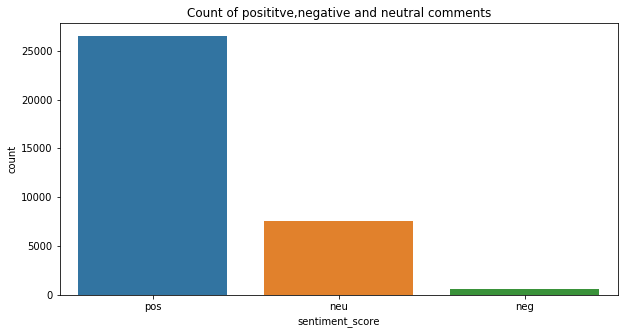

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(df['sentiment_score'])
plt.title('Count of posititve,negative and neutral comments')
plt.show()